## Imports

In [1]:
from dataset.dataset import MultiModalDataset
import PIL
import matplotlib.pyplot as plt
from mmaction.datasets import build_dataset
import torch
import os

/home/sadat/miniconda3/envs/dataloader/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sadat/miniconda3/envs/dataloader/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [2]:
os.chdir('../../..')

## Function to display image

In [3]:
def imshow(tensor, idx=0):
    plt.imshow(tensor.permute(1, 2, 3, 0)[idx])
    plt.axis('off')

## Multimodal Dataset

In [4]:
train_dataset = MultiModalDataset(ann_file='data/wlasl/train_annotations.txt',
                                  root_dir='data/wlasl/rawframes',
                                  clip_len=32,
                                  resolution=224,
                                  frame_interval=1,
                                  num_clips=1
                                  )

test_dataset = MultiModalDataset(ann_file='data/wlasl/test_annotations.txt',
                                 root_dir='data/wlasl/rawframes',
                                 clip_len=32,
                                 resolution=224,
                                 test_mode=True,
                                 frame_interval=1,
                                 num_clips=1
                                 )

# Setting up dataloaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=1,
                                           shuffle=True,
                                           num_workers=4,
                                           pin_memory=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=1,
                                          shuffle=False,
                                          num_workers=4,
                                          pin_memory=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


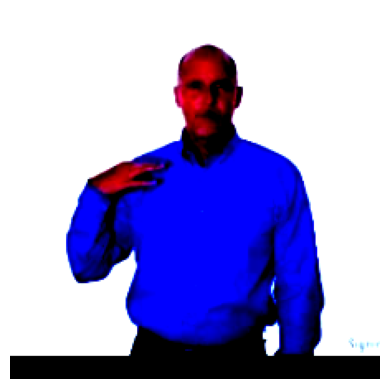

In [5]:
iter_ = iter(test_loader)
batch = next(iter_)
i=0
imshow(batch[0][0])

In [6]:
batch[0][0].shape

torch.Size([3, 32, 224, 224])

## MMCV Dataset

In [7]:
test_cfg = dict(
        type='RawframeDataset',
        ann_file='data/wlasl/test_annotations.txt',
        data_prefix='data/wlasl/rawframes',
        test_mode=True,
        pipeline=[
            dict(
                    type='SampleFrames',
                    clip_len=32,
                    frame_interval=2,
                    num_clips=1,
                    test_mode=True),
            dict(type='RawFrameDecode'),
            dict(type='Resize', scale=(-1, 256)),
            dict(type='CenterCrop', crop_size=224),
            dict(
                type='Normalize',
                mean=[123.675, 116.28, 103.53],
                std=[58.395, 57.12, 57.375],
                to_bgr=False),
            dict(type='FormatShape', input_format='NCTHW'),
            dict(type='Collect', keys=['imgs', 'label'], meta_keys=[]),
            dict(type='ToTensor', keys=['imgs'])
        ])

# Building the datasets
test_dataset = build_dataset(test_cfg)

mmcv_test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                      batch_size=1,
                                      shuffle=False,
                                      num_workers=4,
                                      pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


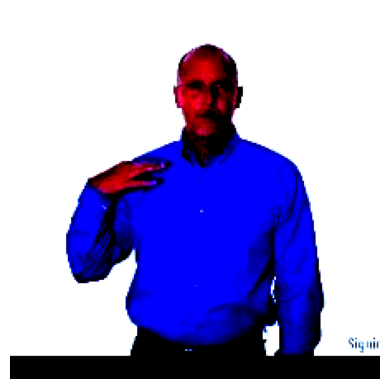

In [8]:
img_iter = iter(mmcv_test_loader)
x = next(img_iter)
mmcv_imgs = x['imgs']
imshow(mmcv_imgs.squeeze(), 0)

In [9]:
video_iter = iter(mmcv_imgs.squeeze().permute(1,2,3,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

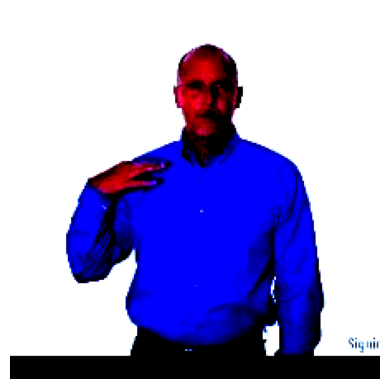

In [10]:
plt.imshow(next(video_iter))
plt.axis('off')